In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

df = pd.read_pickle(f'path_to_close_data')

df

,A,AA,AAC,AAC-UN,AACT,AACT-UN,AAIC-PB,AAIC-PC,AAL,AAM-PA,...,ZM,ZS,ZTO,ZTR,ZTS,ZUMZ,ZUO,ZWS,ZYME,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,40.560001,38.159641,NaN,NaN,NaN,NaN,NaN,NaN,53.910000,NaN,...,NaN,NaN,NaN,13.91,43.310001,38.209999,NaN,27.940001,NaN,0.163636
2015-01-05,39.799999,35.948879,NaN,NaN,NaN,NaN,NaN,NaN,53.880001,NaN,...,NaN,NaN,NaN,13.86,43.049999,38.939999,NaN,26.830000,NaN,0.145455
2015-01-06,39.180000,36.213211,NaN,NaN,NaN,NaN,NaN,NaN,53.040001,NaN,...,NaN,NaN,NaN,13.76,42.630001,38.459999,NaN,26.379999,NaN,0.145455
2015-01-07,39.700001,37.150379,NaN,NaN,NaN,NaN,NaN,NaN,53.009998,NaN,...,NaN,NaN,NaN,13.80,43.509998,40.279999,NaN,26.420000,NaN,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-10,118.360001,34.139999,10.56,10.710,10.150,10.3,19.000000,22.950001,18.570000,22.780001,...,67.620003,154.270004,25.100000,6.09,170.220001,17.309999,10.68,26.690001,8.19,9.180000
2023-07-11,118.480003,34.689999,10.58,10.754,10.160,10.3,19.010000,23.040001,18.799999,23.000000,...,69.739998,147.389999,26.250000,6.11,170.139999,17.730000,10.99,27.100000,8.01,9.060000
2023-07-12,120.000000,35.049999,10.58,10.754,10.160,10.3,18.719999,23.100000,18.570000,22.809999,...,69.800003,137.679993,26.700001,6.06,171.860001,17.900000,10.92,27.180000,8.36,9.130000


<Axes: >

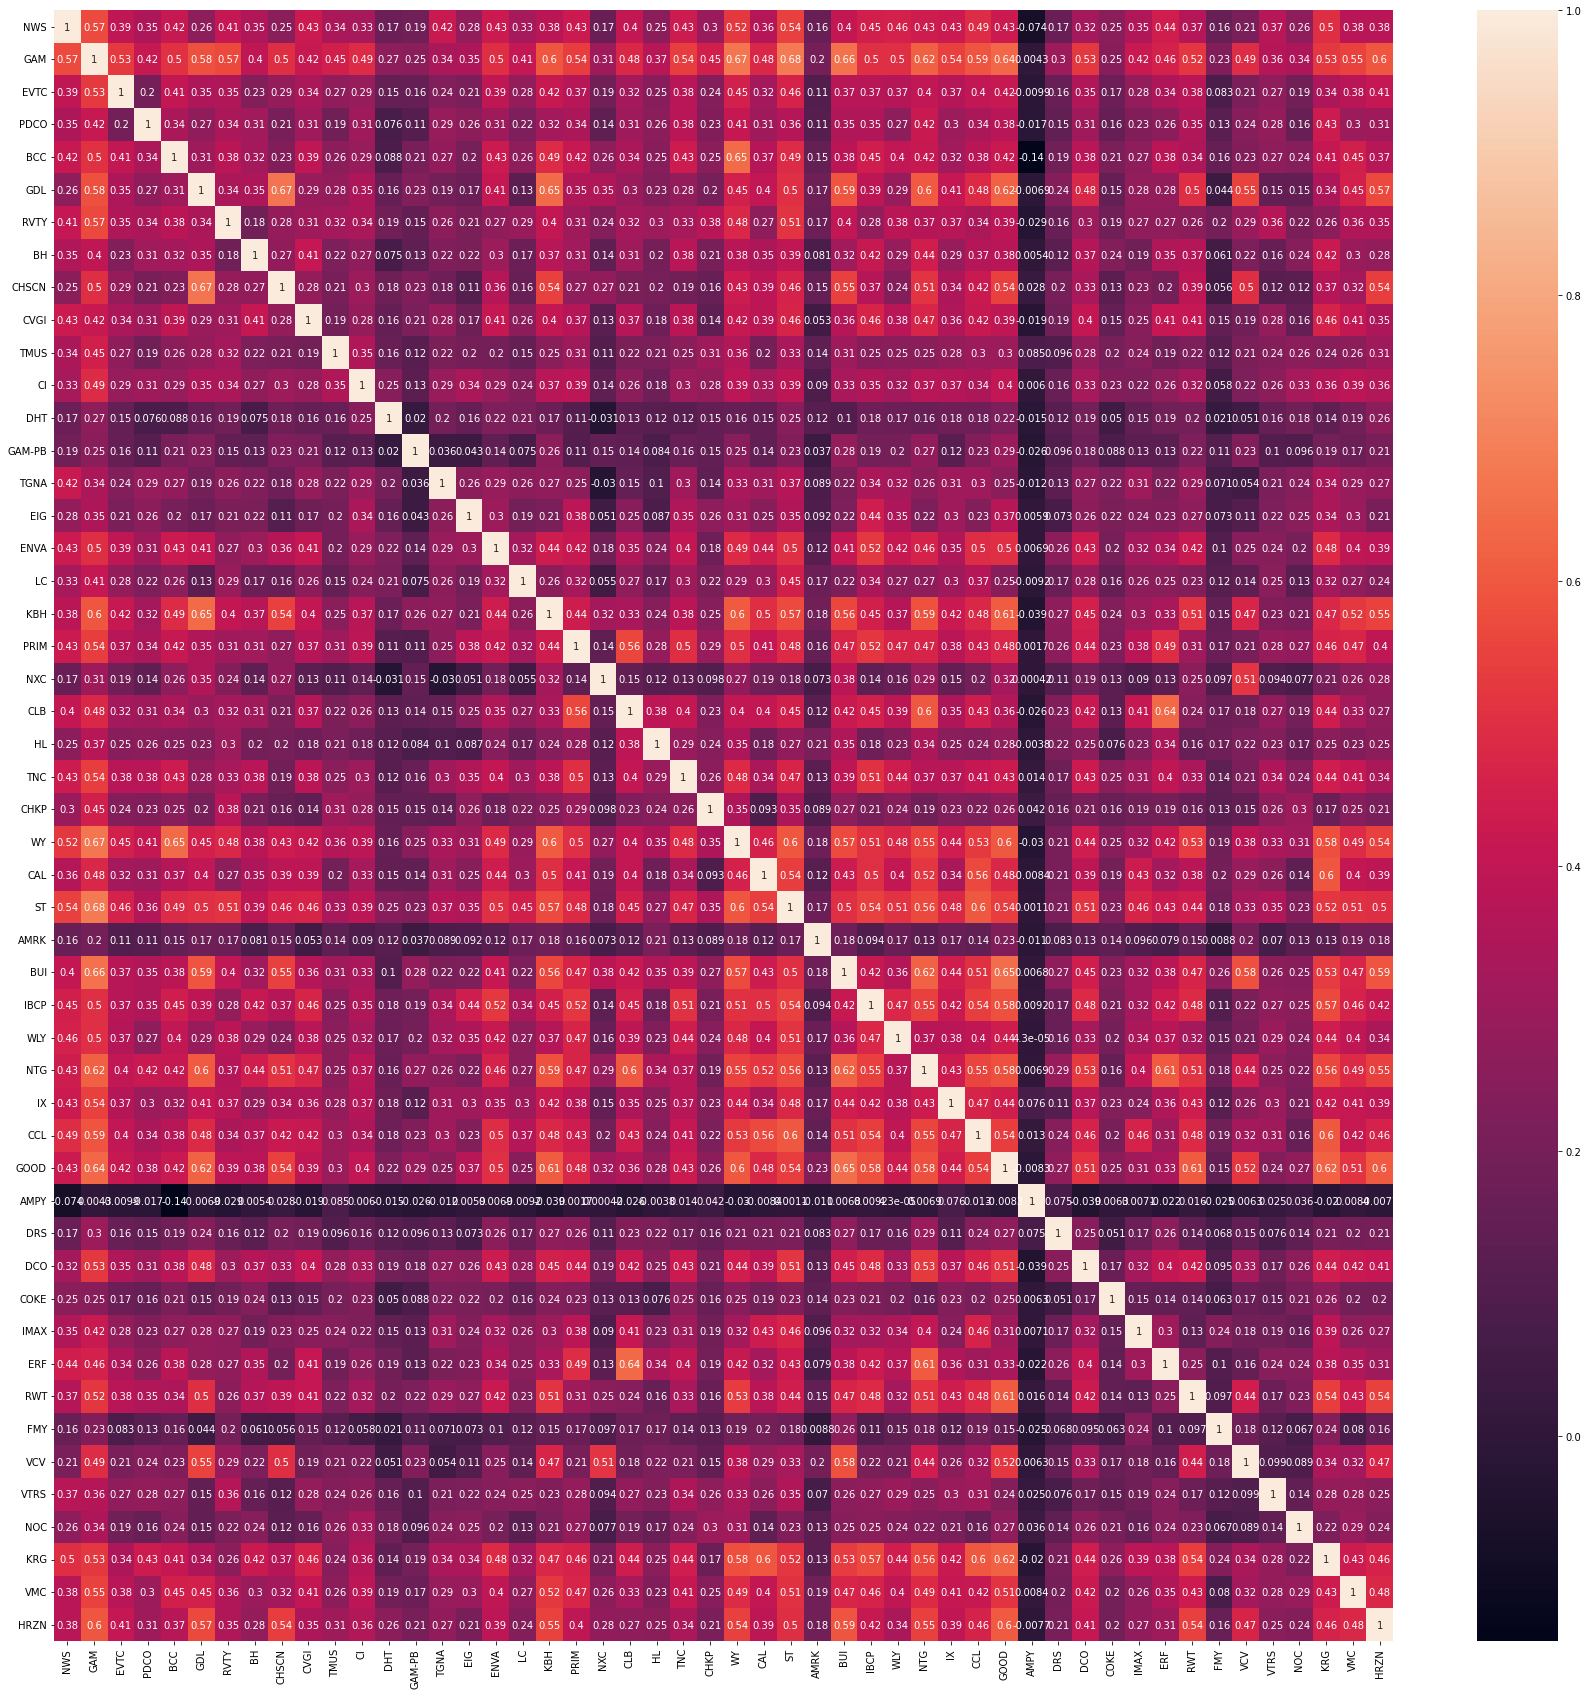

In [1]:
def get_returns_moving_average(df, window=5):
    daily_return = df.pct_change(1)
    sma_dr = daily_return.rolling(window).mean()
    return sma_dr

df_dr = get_returns_moving_average(df)

# Remove any data that does not have the max number of days 
data_count = df_dr.count(axis=0).sort_values(ascending=False)
data_count = pd.DataFrame(data=data_count, columns=['Count'])
data_count = data_count[data_count.Count==max(data_count.Count)]
data_count = data_count.sample(frac=1)

data_count

# Choose sample of 50 stocks
stocks = list(data_count.head(50).index)
df_dr = df_dr[stocks]
df_dr = df_dr.dropna()
corr_matrix = df_dr.corr('pearson')


plt.figure(figsize=(30,30))
sn.heatmap(corr_matrix, annot=True)


In [21]:
import numpy as np

# find most correlated stocks
stock1 = corr_matrix.unstack().sort_values().index[0][0]
stock2 = corr_matrix.unstack().sort_values().index[0][1]

# Find stock loosely correlated to both as a hedge
abs_corr = [sum(np.abs(corrs)) for corrs in zip(corr_matrix[stock1], corr_matrix[stock2])]
stock3index = np.argmin(abs_corr)
stock3 = corr_matrix[stock1].index[stock3index]

stock1, stock2, stock3

('EFXT', 'MQT', 'LLY')

In [22]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin

# Download stock indices 
macro_indices = ['^GSPC', '^TNX', 'GC=F']

yfin.pdr_override()
data = pdr.get_data_yahoo(macro_indices, start='2015-01-01', end='2023-07-30')
unique_cols = set(data.columns.get_level_values(0))

for col in unique_cols:
    sub_df = data.loc[:,data.columns.get_level_values(0).isin({col})].droplevel(0, axis=1)
    sub_df.to_pickle(f'path_to_macro_data/macro_data_{col}.pkl')

[*********************100%***********************]  3 of 3 completed


array([<Axes: title={'center': 'GC=F'}>,
       <Axes: title={'center': '^GSPC'}>,
       <Axes: title={'center': '^TNX'}>], dtype=object)

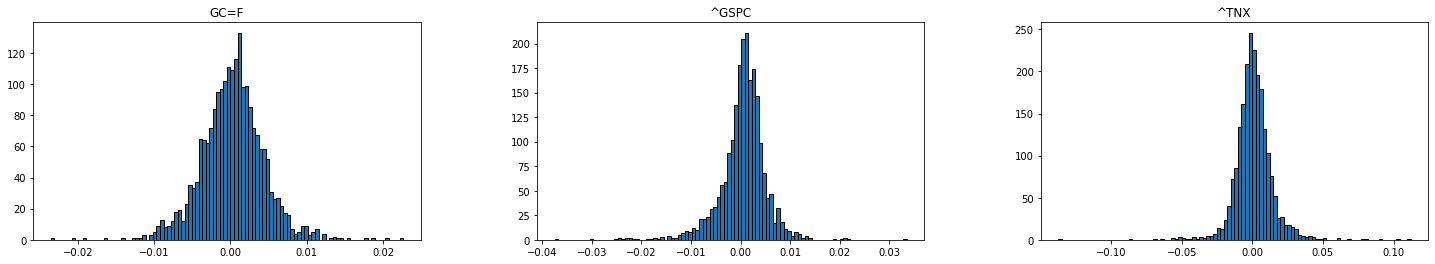

In [23]:
from scipy import stats

# Get daily returns of macro data 
macro_data = pd.read_pickle(f'path_to_macro_data/macro_data_Close.pkl')

def get_vol_returns(df, window=5):
    daily_return = df.pct_change(1)
    vol = daily_return.rolling(window).std()
    return vol

macro_daily_return = get_returns_moving_average(macro_data, window=5).dropna()

#define format for subplots
fig, axis = plt.subplots(1, 3, figsize=(25,4))

#create histogram for each column in DataFrame
macro_daily_return.hist(ax=axis, edgecolor='black', grid=False, bins=100)


,EFXT,MQT,LLY
GC=F,-0.031581,0.296201,0.016883
^GSPC,0.293840,0.356728,0.346136
^TNX,0.193270,-0.421139,-0.050312


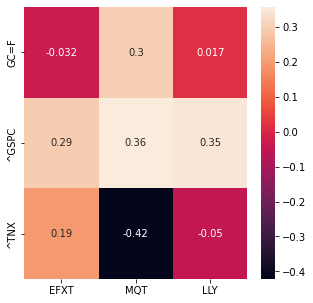

In [24]:
# Join the two returns together
mix_df = macro_daily_return.join(df_dr[[stock1, stock2, stock3]]).dropna()

mix_corr_matrix = mix_df.corr('pearson')
mix_corr_matrix = mix_corr_matrix[[stock1, stock2, stock3]][:3]

plt.figure(figsize=(5,5))
sn.heatmap(mix_corr_matrix, annot=True)

mix_corr_matrix

In [25]:
from sklearn.model_selection import train_test_split

# Create binary signals depending on whether stock / macro index daily returns have increased or decreased
mix_df_binary = np.sign(mix_df).replace(-1, 0).dropna()
mix_df_binary[f'{stock1}+1'] = mix_df_binary[stock1].shift(1)
mix_df_binary[f'{stock2}+1'] = mix_df_binary[stock2].shift(1)
mix_df_binary[f'{stock3}+1'] = mix_df_binary[stock3].shift(1)
mix_df_binary = mix_df_binary.dropna()
mix_df_binary_train, mix_df_binary_test = train_test_split(mix_df_binary, test_size=0.2,shuffle=False)

stocks = [stock1, stock2, stock3]

mix_df_binary_train


,GC=F,^GSPC,^TNX,EFXT,MQT,LLY,EFXT+1,MQT+1,LLY+1
Date,,,,,,,,,
2015-01-12,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2015-01-13,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2015-01-14,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2015-01-15,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2015-01-16,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2021-10-21,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
2021-10-22,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2021-10-25,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [26]:
# Calculate the probabilities for each unique T+1 state given the current state

prob_matrix = mix_df_binary_train.groupby(list(mix_df_binary_train.columns)).size().reset_index(name='state_count')

prob_matrix.sort_values('state_count', ascending=False)

prob_all =  mix_df_binary_train.groupby(list(macro_indices+stocks)).size().reset_index(name='count_all')

prob_matrix = prob_matrix.merge(prob_all)
prob_matrix['prob'] =  prob_matrix['state_count']/prob_matrix['count_all']
del prob_matrix['state_count']
del prob_matrix['count_all']

prob_matrix


,GC=F,^GSPC,^TNX,EFXT,MQT,LLY,EFXT+1,MQT+1,LLY+1,prob
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.100000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.050000
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.050000
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.050000
...,...,...,...,...,...,...,...,...,...,...
325,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.108108
326,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.027027
327,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.108108
328,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.081081


In [70]:
# Markov Decision Process Algorithm
pm = prob_matrix
pm_cols = pm.columns

# Set constants 
gamma = 0.9
theta = 0.00000001

#  Create a lookup of known states
pm['Lookup'] = pm[pm_cols[0]].astype(str) + pm[pm_cols[1]].astype(str) + pm[pm_cols[2]].astype(str) + pm[pm_cols[3]].astype(str) + pm[pm_cols[4]].astype(str) + pm[pm_cols[5]].astype(str)

# Starting optimal variables
pm['V_pi'] = 0
pm['V_pi_old'] = 0
pm['V_pi_diff'] = 0

# Get the unique known states in order to filter the df
uv = [''.join([str(y) for y in x]) for x in pm[pm_cols[:6]].drop_duplicates().to_numpy()]

# Initialise optimal policy
optimal_policy = []

# Value Iteration algorithm
for i, v in enumerate(uv):
    # For each unique state, assign a starting optimal expected value and policy
    v_pol = None
    v_pi = 0
    
    # Filter probability matrix with the unique state 
    sub_df = pm[pm.Lookup==v]
    
    # Iterate until abs(v_pi_new - v_pi) < theta
    while True:

        # Create copy of olf v_pi
        sub_df['V_pi_old'] = sub_df['V_pi']
        v_pi = max(sub_df['V_pi_old'])

        #  Get expected values and v_pi
        sub_df['V_pi'] = sub_df['prob'] * ((sub_df[f'{stock1}+1'] + sub_df[f'{stock2}+1'] + sub_df[f'{stock3}+1'] ) + (gamma * sub_df['V_pi_old']))
        v_pi_new = max(sub_df['V_pi'])

        # Compare against theta, iterate again, or update optimal policy
        if abs(v_pi_new - v_pi) < theta:
            v_pol = sub_df[sub_df.V_pi==v_pi_new].head(1)
            v_pi = v_pi_new
            optimal_policy.append([v_pol[pm_cols[:9]], v_pi])
            break

/var/folders/81/mp0t3wt123x2394w0zx2f6y40000gn/T/ipykernel_47896/2116761874.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['V_pi_old'] = sub_df['V_pi']
/var/folders/81/mp0t3wt123x2394w0zx2f6y40000gn/T/ipykernel_47896/2116761874.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['V_pi'] = sub_df['prob'] * ((sub_df[f'{stock1}+1'] + sub_df[f'{stock2}+1'] + sub_df[f'{stock3}+1'] ) + (gamma * sub_df['V_pi_old']))


In [28]:
# Map optimal policy for each given state
op_df = pd.concat([x[0] for x in optimal_policy]).reset_index(drop=True)
op_df['V_pi'] = [x[1] for x in optimal_policy]
op_df

,GC=F,^GSPC,^TNX,EFXT,MQT,LLY,EFXT+1,MQT+1,LLY+1,V_pi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.109890
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.803279
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.553191
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,2.000000
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.818182
...,...,...,...,...,...,...,...,...,...,...
59,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,2.105263
60,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.769231
61,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.896552
62,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.176471


In [29]:
test_op = mix_df_binary_test.reset_index().merge(op_df, on=op_df.columns[:6].to_list(),how='left')
test_ts_data = test_op[['Date', stock1, stock2, stock3]]
test_ts_data = test_ts_data.set_index('Date')
test_ts_data

,EFXT,MQT,LLY
Date,,,
2021-10-28,0.0,0.0,1.0
2021-10-29,0.0,0.0,1.0
2021-11-01,1.0,1.0,1.0
2021-11-02,1.0,1.0,1.0
2021-11-03,0.0,1.0,1.0
...,...,...,...
2023-07-10,1.0,0.0,0.0
2023-07-11,1.0,0.0,0.0
2023-07-12,1.0,1.0,0.0


In [34]:
# Map actions back to original stock data and calculate returns 

df = pd.read_pickle(f'path_to_close_data')

ts_aciton = test_ts_data.join(df[[stock1, stock2, stock3]], lsuffix="_A")

for stock in stocks:
    ts_aciton[f'DailyReturns_{stock}'] = ts_aciton[f'{stock}'].pct_change().shift(-1)
    ts_aciton[f'RealisedReturns_{stock}'] = (50/ts_aciton[f'{stock}']) * ts_aciton[f'{stock}'] * ts_aciton[f'{stock}_A'] * ts_aciton[f'DailyReturns_{stock}']
    ts_aciton[f'CReturns_{stock}'] = ts_aciton[f'RealisedReturns_{stock}'].cumsum()

ts_aciton['CreturnsALL'] = ts_aciton[f'CReturns_{stock1}'] + ts_aciton[f'CReturns_{stock2}'] + ts_aciton[f'CReturns_{stock3}'] 
ts_aciton = ts_aciton.dropna()
ts_aciton

,EFXT_A,MQT_A,LLY_A,EFXT,MQT,LLY,DailyReturns_EFXT,RealisedReturns_EFXT,CReturns_EFXT,DailyReturns_MQT,RealisedReturns_MQT,CReturns_MQT,DailyReturns_LLY,RealisedReturns_LLY,CReturns_LLY,CreturnsALL
Date,,,,,,,,,,,,,,,,
2021-10-28,0.0,0.0,1.0,8.55,13.95,253.350006,0.000000,0.000000,0.000000,0.013620,0.000000,0.000000,0.005565,0.278269,0.278269,0.278269
2021-10-29,0.0,0.0,1.0,8.55,14.14,254.759995,0.042105,0.000000,0.000000,0.009194,0.000000,0.000000,-0.021393,-1.069634,-0.791365,-0.791365
2021-11-01,1.0,1.0,1.0,8.91,14.27,249.309998,0.000000,0.000000,0.000000,0.010512,0.525577,0.525577,0.030244,1.512175,0.720811,1.246387
2021-11-02,1.0,1.0,1.0,8.91,14.42,256.850006,-0.044893,-2.244667,-2.244667,0.003467,0.173371,0.698948,0.036636,1.831809,2.552620,1.006901
2021-11-03,0.0,1.0,1.0,8.51,14.47,266.260010,0.009401,0.000000,-2.244667,-0.001382,-0.069110,0.629838,0.017802,0.890106,3.442725,1.827896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-05,1.0,1.0,1.0,6.86,10.08,465.700012,-0.027697,-1.384840,-3.357451,-0.007937,-0.396825,6.566004,-0.005347,-0.267342,23.841153,27.049706
2023-07-06,1.0,0.0,1.0,6.67,10.00,463.209991,0.061469,3.073462,-0.283989,0.000000,0.000000,6.566004,-0.024028,-1.201399,22.639754,28.921768
2023-07-07,1.0,0.0,0.0,7.08,10.00,452.079987,0.016949,0.847457,0.563468,0.004000,0.000000,6.566004,0.002389,0.000000,22.639754,29.769225


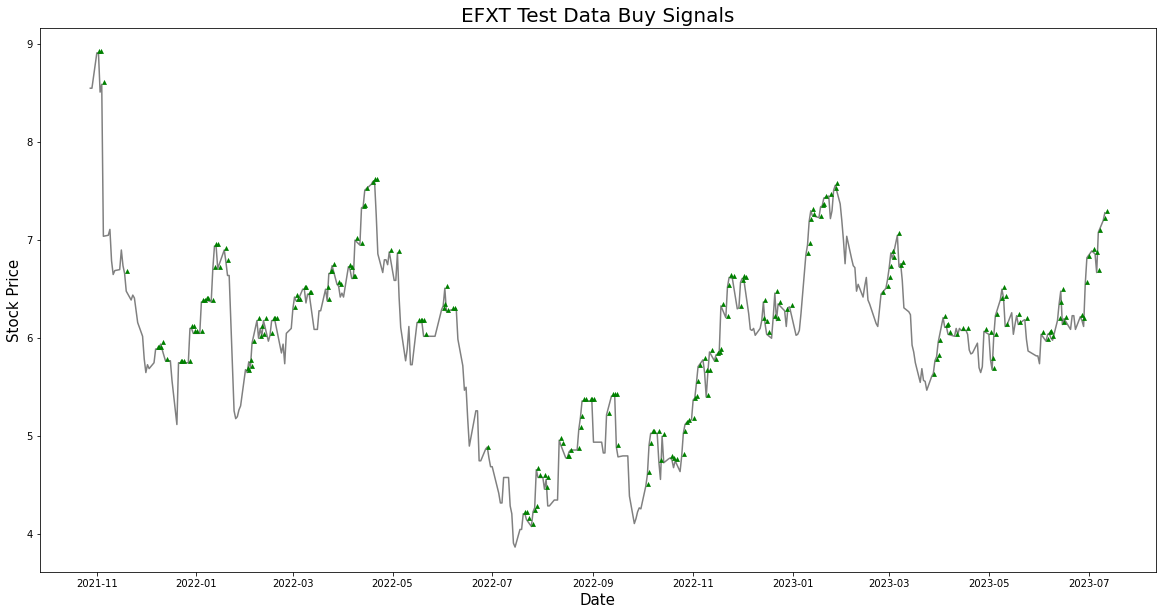

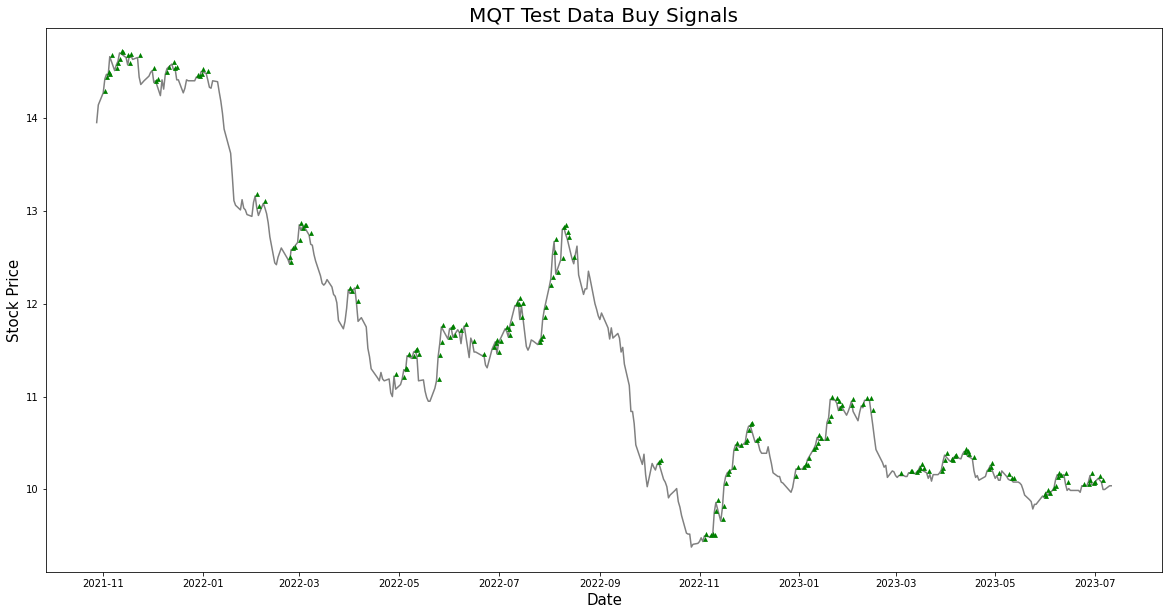

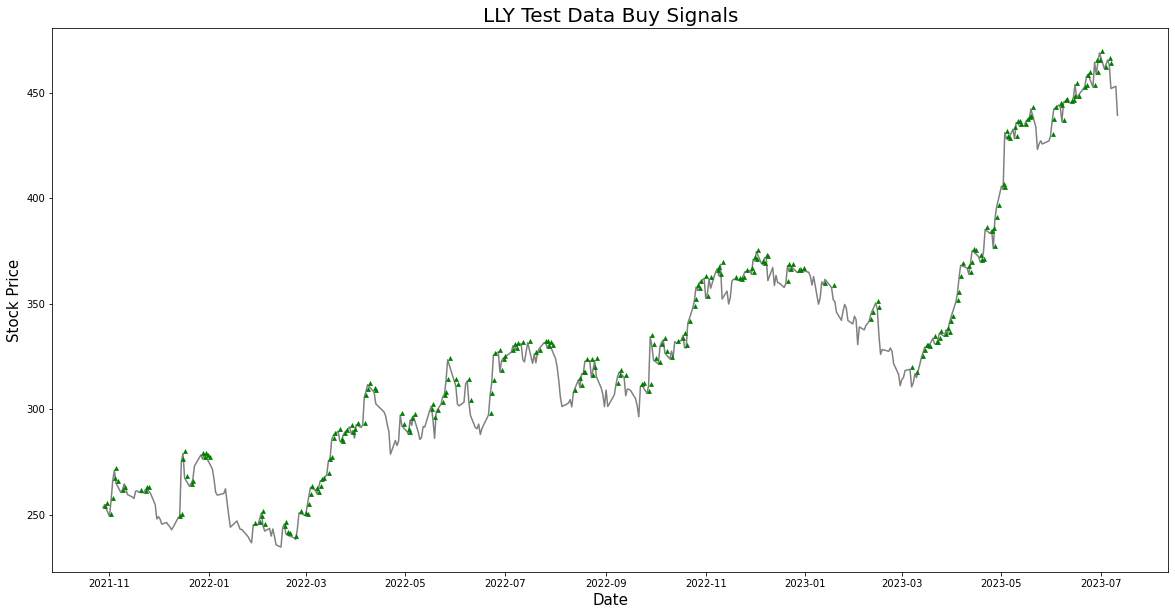

In [69]:
# Plot buy signal days

for stock in stocks:

    fig, ax = plt.subplots(figsize=(20, 10))

    ax.plot(ts_aciton.index, ts_aciton[f'{stock}'], color='grey')
    ax.set_title(f'{stock} Test Data Buy Signals', fontsize=20)
    ax.set_ylabel('Stock Price', fontsize=15)
    ax.set_xlabel('Date', fontsize=15)
    for x, y, signal, in zip(ts_aciton.index, ts_aciton[f'{stock}'], ts_aciton[f'{stock}_A']):
        signal = '▴' if signal==1 else ''
        ax.text(x, y, f'{signal}', color='green', size=10)
